Outliers...

In [2]:
# Cell 1 — imports + load dataset
import os                     # for checking file existence
import numpy as np            # numerical ops
import pandas as pd           # dataframes
import matplotlib.pyplot as plt
import seaborn as sns

# notebook-friendly plotting; works inside Jupyter
%matplotlib inline

# Try to load your Day-1 processed Titanic dataset; fallback to seaborn titanic if not found
path = r"C:\Users\Admin\Documents\Machine_Learning\DataPreprocessing\ML_DataPreprocessing\Outputs_Datasets\titanic_pipeline_processed.csv"                    # change only if your file is elsewhere
if os.path.exists(path):
    df = pd.read_csv(path)                           # load Day-1 dataset
    print(f"Loaded dataset from: {path}")
else:
    df = sns.load_dataset('titanic')                 # fallback example dataset
    print("Day-1 file not found — loaded seaborn's titanic as fallback")

# Show shape and a quick peek
print("Shape (rows, cols):", df.shape)               # dataset size
display(df.head())                                   # first 5 rows for quick inspection

# Identify numeric columns (exclude obvious ID columns if present)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# optional: remove PassengerId-like columns from numeric list if present
numeric_cols = [c for c in numeric_cols if c.lower() not in ('passengerid','passenger_id')]
print("Numeric columns to inspect:", (numeric_cols))
print("Number of Numeric columns to inspect:", len(numeric_cols))


Loaded dataset from: C:\Users\Admin\Documents\Machine_Learning\DataPreprocessing\ML_DataPreprocessing\Outputs_Datasets\titanic_pipeline_processed.csv
Shape (rows, cols): (891, 26)


,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,deck_missing,embark_town_missing,alive_missing,sex,embarked,class,who,deck,embark_town,alive
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,male,S,Third,man,C,Southampton,no
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,female,C,First,woman,C,Cherbourg,yes
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,female,S,Third,woman,C,Southampton,yes
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,female,S,First,woman,C,Southampton,yes
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,male,S,Third,man,C,Southampton,no


Numeric columns to inspect: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'survived_missing', 'pclass_missing', 'age_missing', 'sibsp_missing', 'parch_missing', 'fare_missing', 'sex_missing', 'embarked_missing', 'class_missing', 'who_missing', 'deck_missing', 'embark_town_missing', 'alive_missing']
Number of Numeric columns to inspect: 19


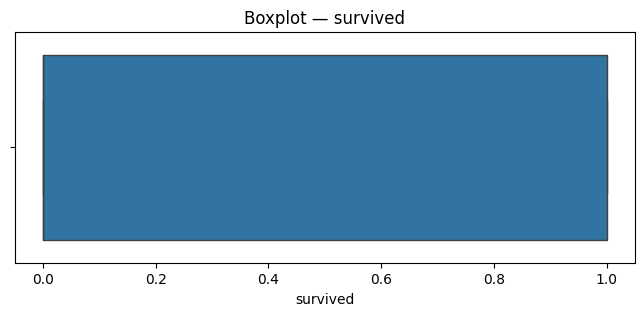

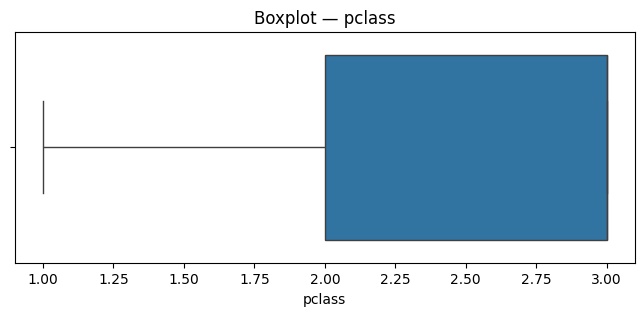

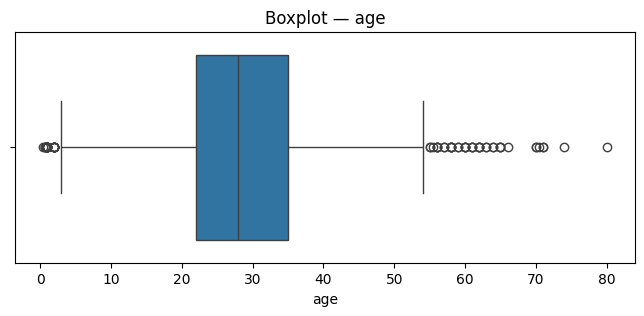

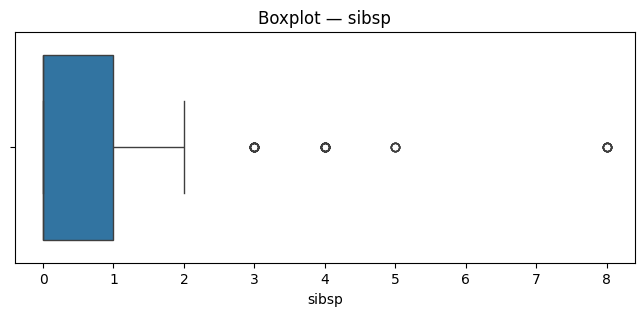

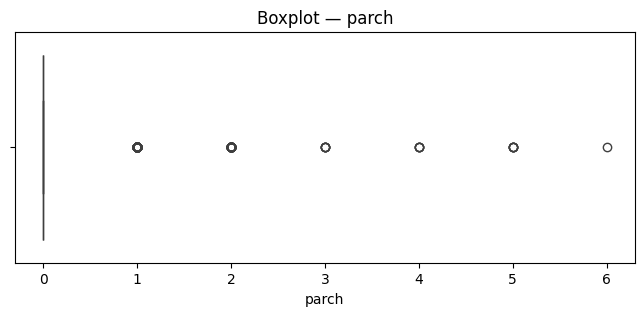

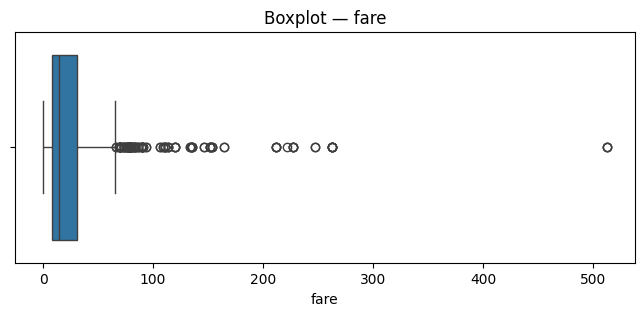

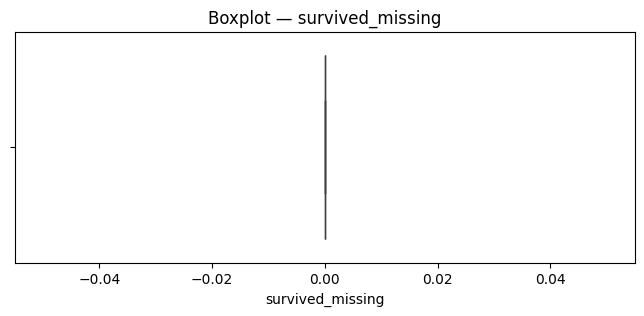

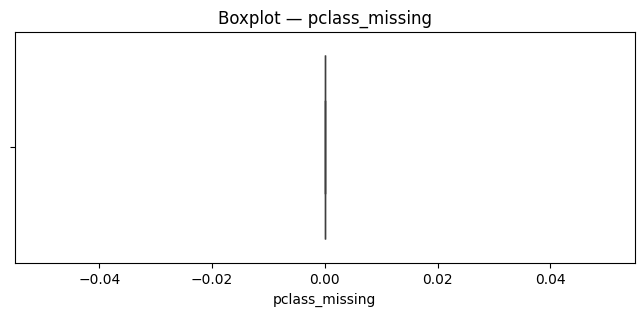

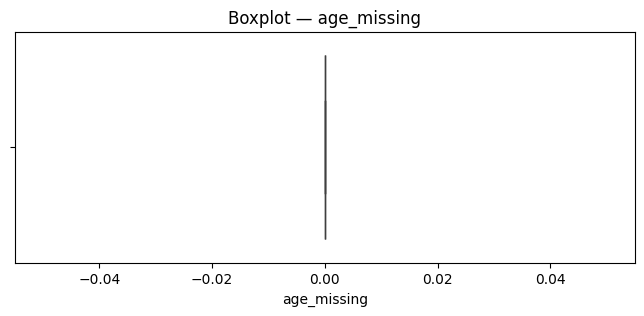

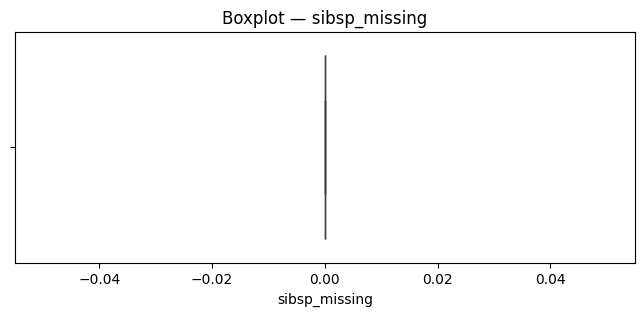

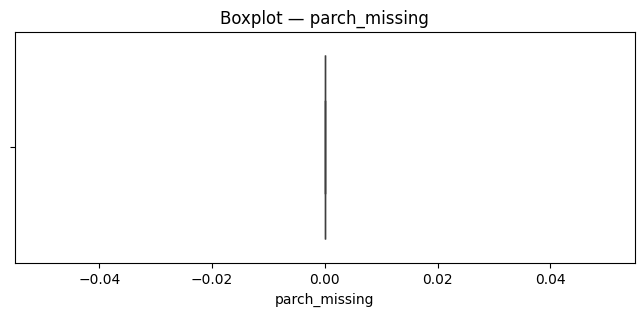

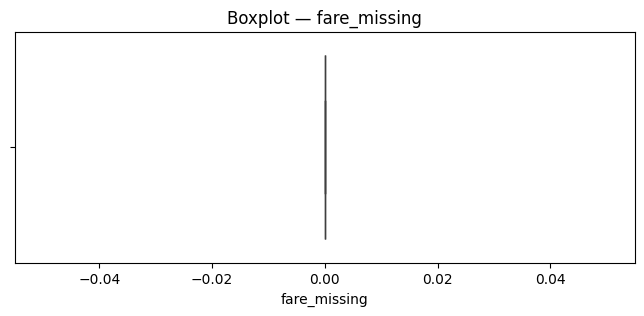

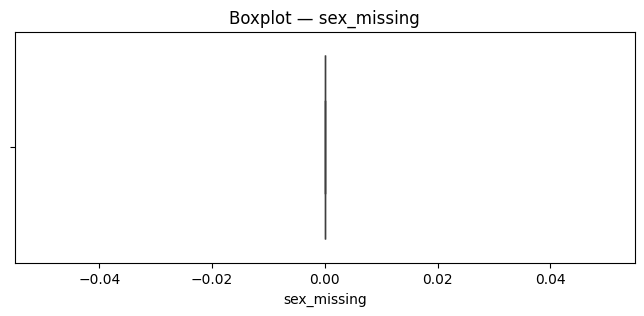

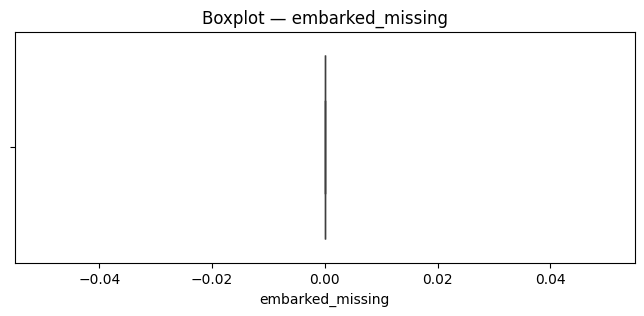

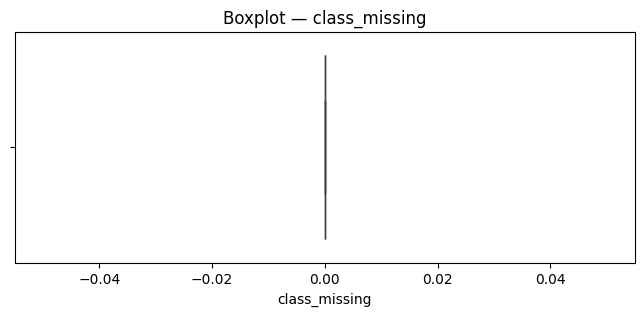

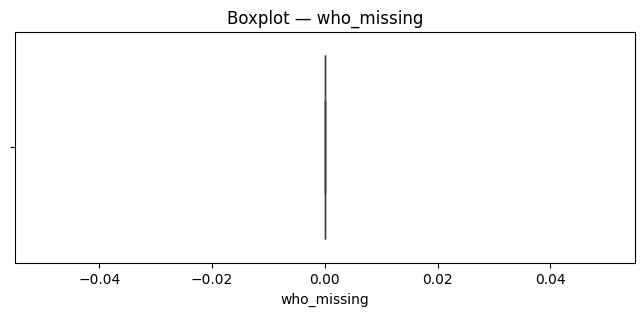

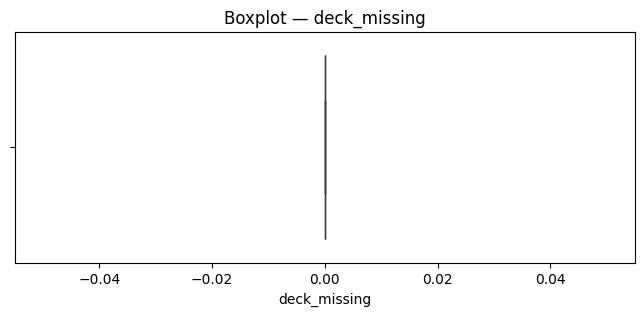

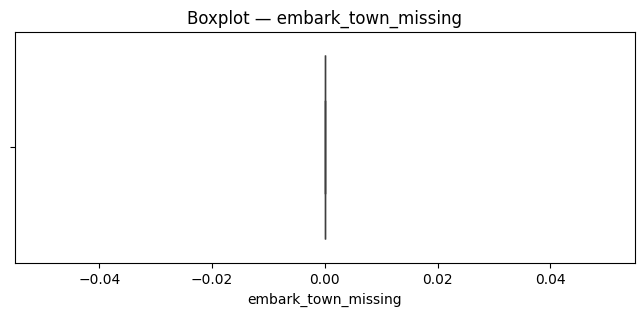

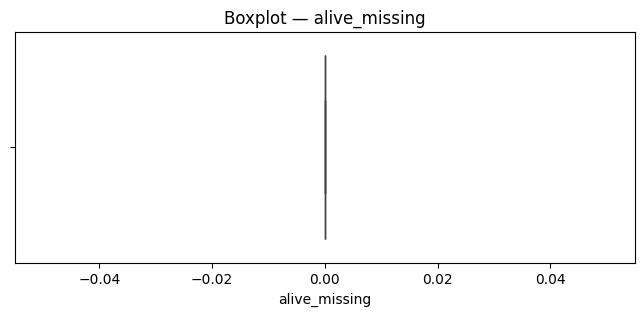

In [32]:
# # 1️⃣ Boxplots — visualize one column at a time
# for col in numeric_cols:
#     plt.figure(figsize=(8,3))                    # set figure size
#     sns.boxplot(x=df[col].dropna(), orient='h')  # horizontal boxplot, ignore NaN
#     plt.title(f"Boxplot — {col}")               # plot title
#     plt.xlabel(col)
#     plt.show()

def plot_boxplots(df, cols=None, figsize=(8,3)):
    """Plot individual horizontal boxplot per numeric column for clear detection."""
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in cols:
        plt.figure(figsize=figsize)                     # size for each plot
        sns.boxplot(x=df[col].dropna(), orient='h')     # horizontal boxplot
        plt.title(f"Boxplot — {col}")
        plt.xlabel(col)
        plt.show()
# Example usage:
plot_boxplots(df, numeric_cols)

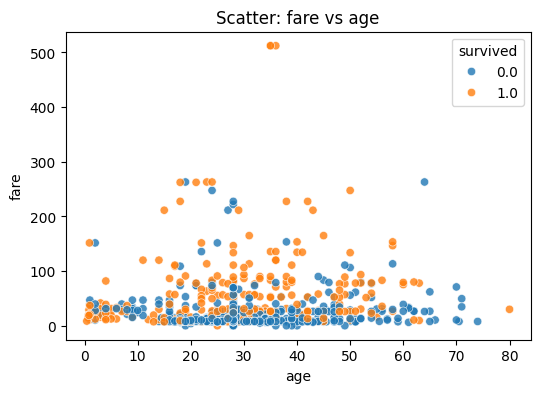

Numeric columns to inspect: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'survived_missing', 'pclass_missing', 'age_missing', 'sibsp_missing', 'parch_missing', 'fare_missing', 'sex_missing', 'embarked_missing', 'class_missing', 'who_missing', 'deck_missing', 'embark_town_missing', 'alive_missing']
Number of Numeric columns to inspect: 19


In [ ]:
# # 2️⃣ Scatterplot — example: Age vs Fare
# print("Scatterplot cell running...")  # Add this at the top of the cell
# if 'age' in df.columns and 'fare' in df.columns:
#     plt.figure(figsize=(6,4))
#     sns.scatterplot(data=df, x='age', y='fare', hue='survived', alpha=0.7)
#     plt.title("Scatterplot — Fare vs Age")
#     # # Add before plotting
#     # print("Columns:", df.columns)
#     print("Non-NaN Age/Fare rows:", df[['age', 'fare']].dropna().shape[0])
#     plt.show()
    
def plot_scatter(df, x, y, hue=None, figsize=(6,4)):
    """Scatter plot for two numeric columns; hue optional (e.g., 'survived')."""
    plt.figure(figsize=figsize)
    sns.scatterplot(data=df, x=x, y=y, hue=hue, alpha=0.8)
    plt.title(f"Scatter: {y} vs {x}")
    plt.show()
# Example usage:
if 'age' in df.columns and 'fare' in df.columns:
    plot_scatter(df, x='age', y='fare', hue='survived')


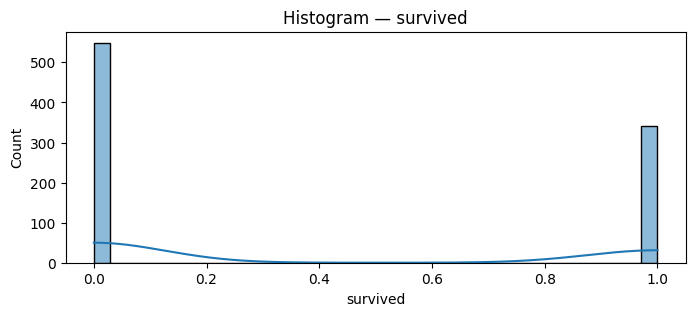

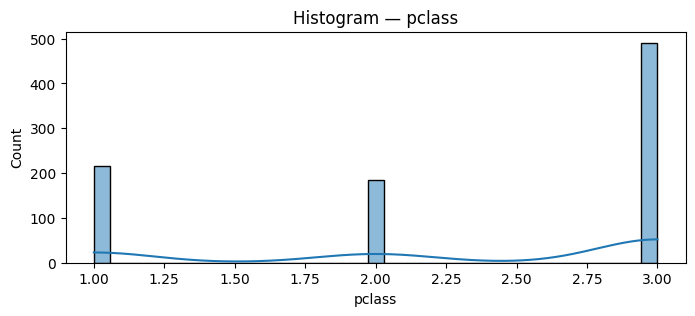

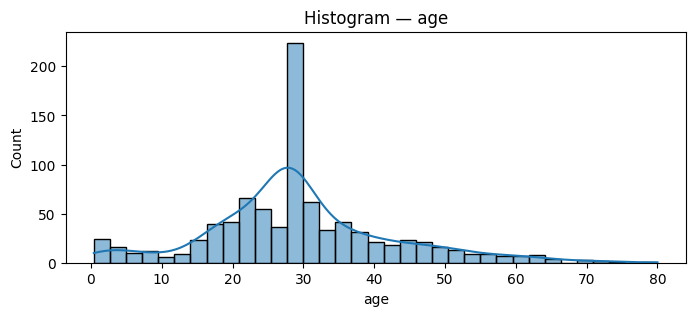

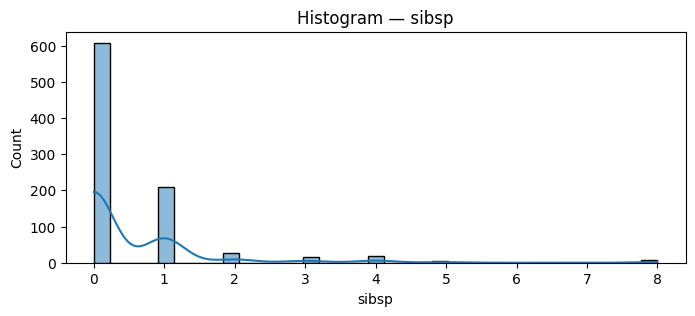

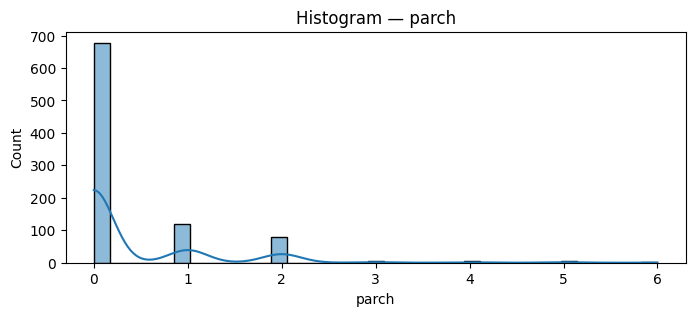

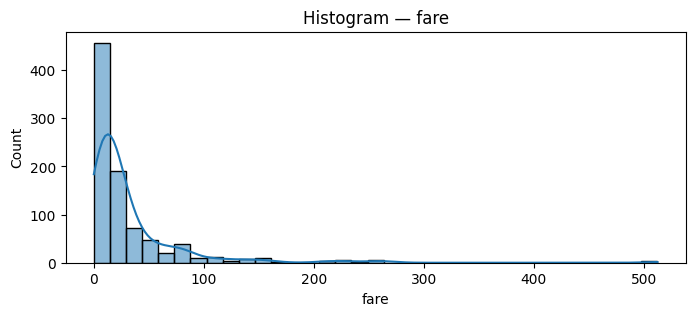

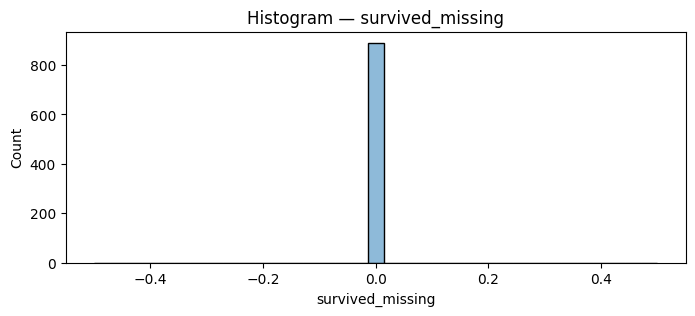

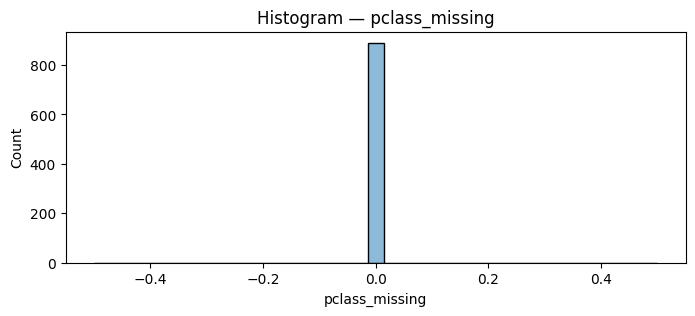

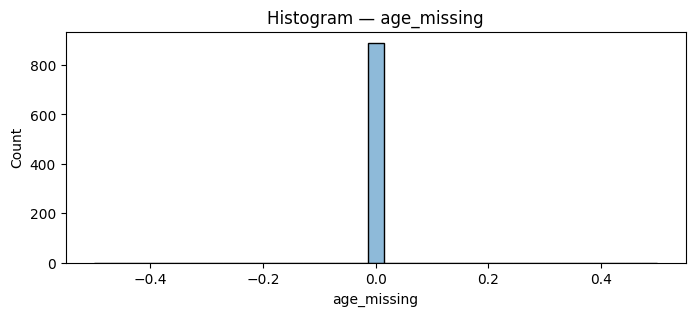

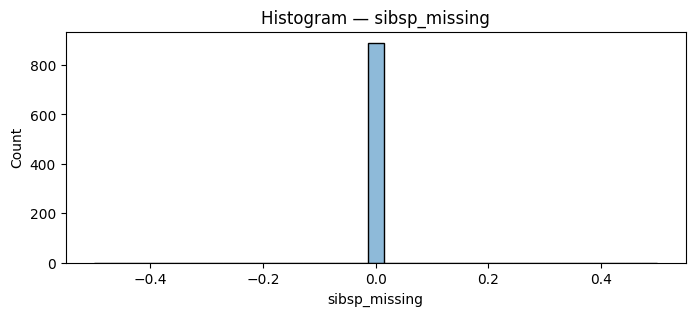

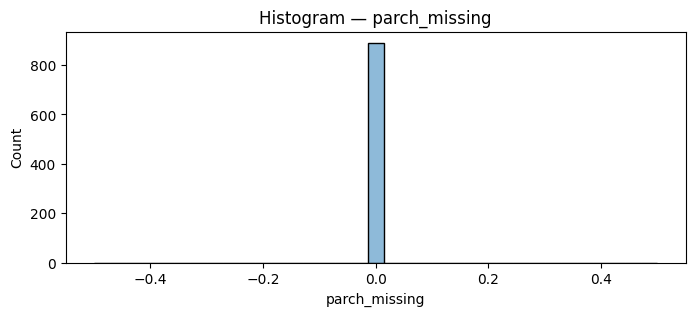

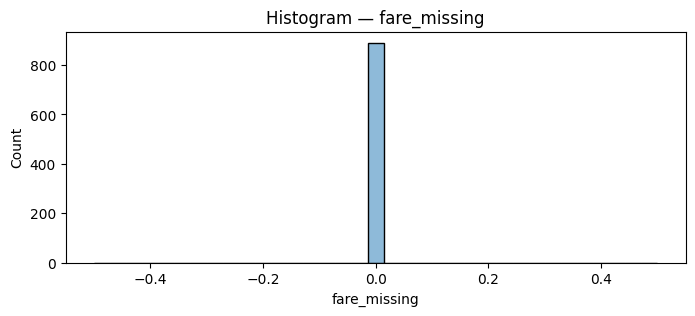

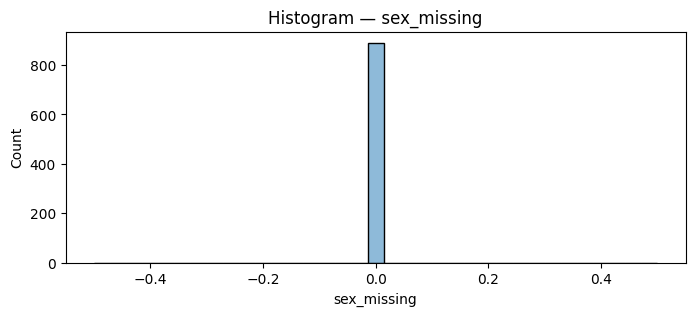

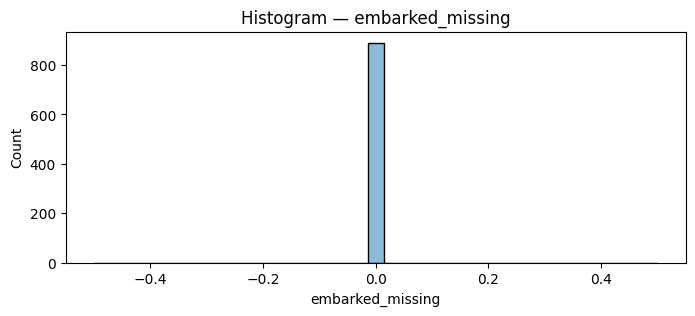

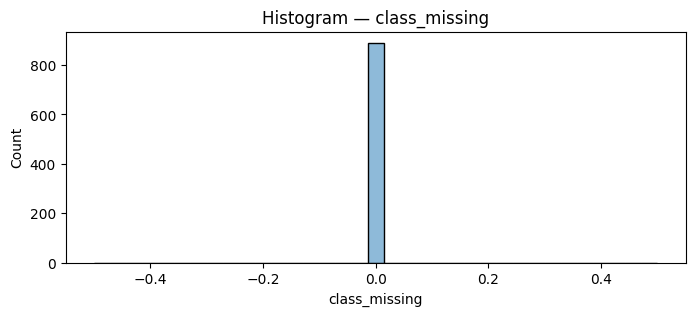

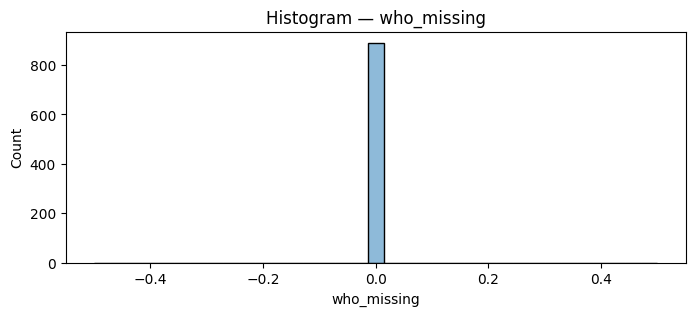

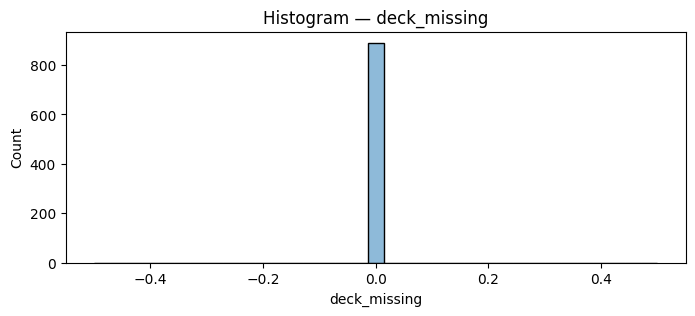

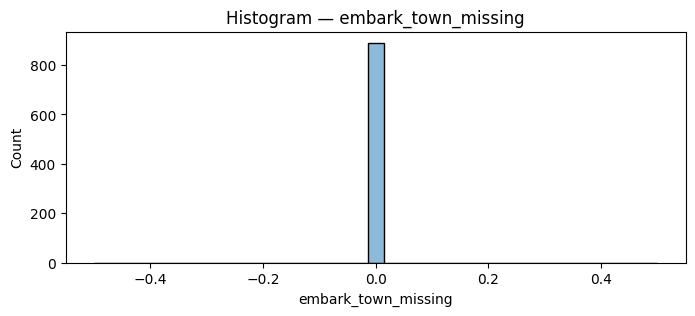

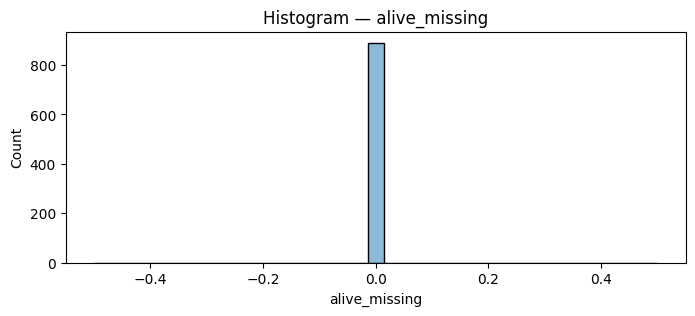

In [33]:

def plot_histograms(df, cols, bins=35, figsize=(8,3)):
    """Plot histogram + KDE per column to check skew/long tails."""
    for col in cols:
        plt.figure(figsize=figsize)
        sns.histplot(df[col].dropna(), bins=bins, kde=True)
        plt.title(f"Histogram — {col}")
        plt.xlabel(col)
        plt.show()
# Example usage:
plot_histograms(df, numeric_cols)


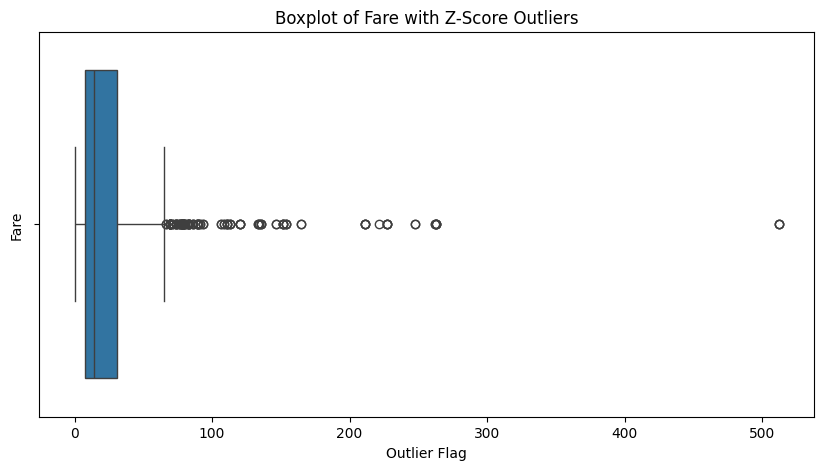

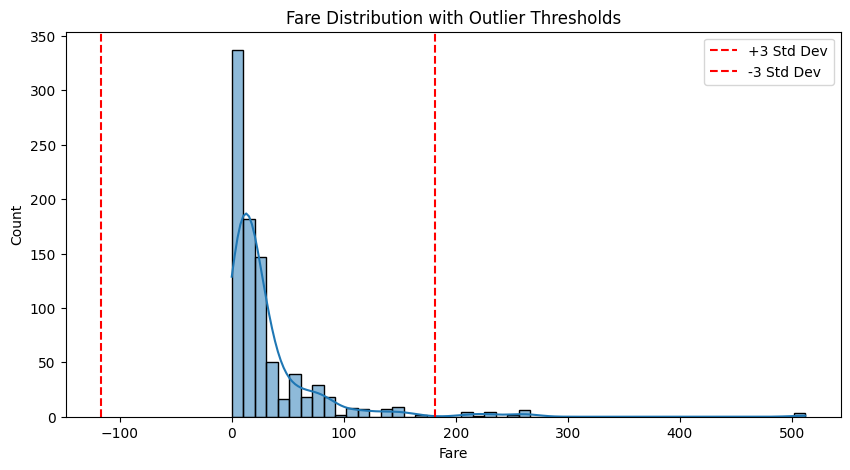

In [ ]:
# Step 1: Calculate mean & std of 'fare'
fare_mean = df['fare'].mean()
fare_std = df['fare'].std()

# Step 2: Compute Z-score
df['fare_zscore'] = (df['fare'] - fare_mean) / fare_std

# Step 3: Flag outliers (threshold = ±3)
df['fare_outlier'] = df['fare_zscore'].apply(lambda x: 1 if np.abs(x) > 3 else 0)

# Step 4: Visualize (Boxplot with outlier flags)
plt.figure(figsize=(10,5))
sns.boxplot(x=df['fare_outlier'], y=df['fare'])
plt.title("Boxplot of Fare with Z-Score Outliers")
plt.xlabel("Outlier Flag")
plt.ylabel("Fare")
plt.show()

# Step 4: Visualize (Histogram with thresholds)
plt.figure(figsize=(10,5))
sns.histplot(df['fare'], bins=50, kde=True)
plt.axvline(fare_mean + 3*fare_std, color='r', linestyle='--', label='+3 Std Dev')
plt.axvline(fare_mean - 3*fare_std, color='r', linestyle='--', label='-3 Std Dev')
plt.title("Fare Distribution with Outlier Thresholds")
plt.xlabel("Fare")
plt.legend()

plt.show()

In [41]:
# Show some outliers
df[df['fare_outlier'] == 1].head()

,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,alive_missing,sex,embarked,class,who,deck,embark_town,alive,fare_zscore,fare_outlier
27,0.0,1.0,19.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,male,S,First,man,C,Southampton,no,4.644393,1
88,1.0,1.0,23.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,female,S,First,woman,C,Southampton,yes,4.644393,1
118,0.0,1.0,24.0,0.0,1.0,247.5208,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,no,4.332899,1
258,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,female,C,First,woman,C,Cherbourg,yes,9.661740,1
299,1.0,1.0,50.0,0.0,1.0,247.5208,0.0,0.0,0.0,0.0,...,0.0,female,C,First,woman,B,Cherbourg,yes,4.332899,1


Column: fare
Q1: 7.91, Q3: 31.00, IQR: 23.09
Lower fence: -26.72, Upper fence: 65.63
Total outliers in 'fare': 116


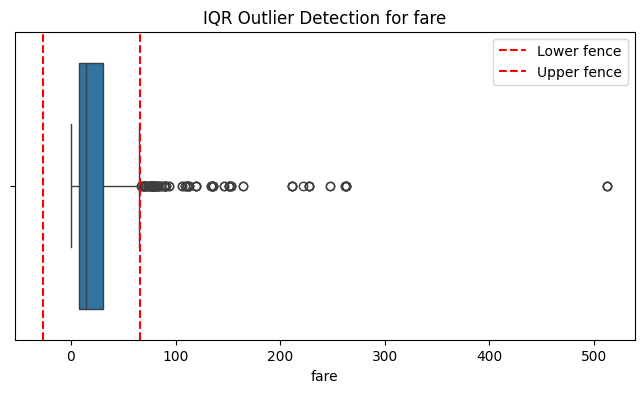

,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,alive_missing,sex,embarked,class,who,deck,embark_town,alive,fare_zscore,fare_outlier
258,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,female,C,First,woman,C,Cherbourg,yes,9.661740,1
737,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,yes,9.661740,1
679,1.0,1.0,36.0,0.0,1.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,yes,9.661740,1
27,0.0,1.0,19.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,male,S,First,man,C,Southampton,no,4.644393,1
341,1.0,1.0,24.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,female,S,First,woman,C,Southampton,yes,4.644393,1


In [51]:
# Step 1: Pick a column to check (example: Fare)
col = 'fare'
data = df[col].dropna()   # drop NaNs for safe calculations

# Step 2: Calculate Q1, Q3, and IQR
Q1 = data.quantile(0.25)   # 25th percentile
Q3 = data.quantile(0.75)   # 75th percentile
IQR = Q3 - Q1

# Step 3: Define outlier fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Column: {col}")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower fence: {lower_fence:.2f}, Upper fence: {upper_fence:.2f}")

# Step 4: Identify outliers in the column
outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
print(f"Total outliers in '{col}': {outliers.shape[0]}")

# Step 5: Visualize with boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df[col])
plt.axvline(lower_fence, color='r', linestyle='--', label="Lower fence")
plt.axvline(upper_fence, color='r', linestyle='--', label="Upper fence")
plt.title(f"IQR Outlier Detection for {col}")
plt.legend()
plt.show()

# Optional: Show top 5 extreme values
display(outliers.sort_values(by=col, ascending=False).head())


In [57]:
# Optional: Show top 5 extreme values
display(outliers.sort_values(by=col, ascending=False).head())

,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,alive_missing,sex,embarked,class,who,deck,embark_town,alive,fare_zscore,fare_outlier
258,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,female,C,First,woman,C,Cherbourg,yes,9.661740,1
737,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,yes,9.661740,1
679,1.0,1.0,36.0,0.0,1.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,yes,9.661740,1
27,0.0,1.0,19.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,male,S,First,man,C,Southampton,no,4.644393,1
341,1.0,1.0,24.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,female,S,First,woman,C,Southampton,yes,4.644393,1


In [62]:
# from scipy import stats

# def detect_outliers(data, col, method="iqr", threshold=3):
#     """
#     Detect outliers in a given column using IQR or Z-Score.
    
#     Parameters:
#         data: DataFrame
#         col: column name (string)
#         method: "iqr" or "zscore"
#         threshold: cutoff (default 3 for z-score, 1.5*IQR for iqr)
    
#     Returns:
#         DataFrame rows that are outliers.
#     """
#     if method == "iqr":
#         # IQR method
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
#         return data[(data[col] < lower) | (data[col] > upper)]
    
#     elif method == "zscore":
#         # Z-Score method
#         z_scores = stats.zscore(data[col].dropna())  # compute z-scores
#         abs_z = np.abs(z_scores)
#         return data.loc[abs_z > threshold, [col]]
    
#     else:
#         raise ValueError("Method must be 'iqr' or 'zscore'")


from scipy import stats
import numpy as np
import pandas as pd

def detect_outliers(df, cols=None, method=('iqr','zscore'), iqr_k=1.5, z_thresh=3.0):
    """
    Detect outliers in given numeric columns using IQR and/or Z-Score rules.

    Args:
        df (pd.DataFrame): Dataset
        cols (list or None): Columns to check (default = all numeric columns)
        method (tuple or list): Which methods to use ('iqr', 'zscore', or both)
        iqr_k (float): Multiplier for IQR method (default 1.5)
        z_thresh (float): Threshold for Z-Score method (default 3.0)

    Returns:
        mask (pd.Series): Boolean mask (True = row flagged as outlier by ANY method)
        counts (dict): Count of outliers per column and method
                       e.g., {'fare': {'iqr': 116, 'zscore': 50}, ...}
    """
    
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    mask = pd.Series(False, index=df.index)   # cumulative mask
    counts = {col: {} for col in cols}        # store counts per method

    for col in cols:
        # IQR method
        if 'iqr' in method:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - iqr_k * IQR
            upper = Q3 + iqr_k * IQR
            this_mask = (df[col] < lower) | (df[col] > upper)
            counts[col]['iqr'] = int(this_mask.sum())
            mask = mask | this_mask

        # Z-Score method
        if 'zscore' in method:
            # compute z-scores ignoring NaNs
            z = stats.zscore(df[col].fillna(df[col].median()))
            this_mask = np.abs(z) > z_thresh
            counts[col]['zscore'] = int(this_mask.sum())
            mask = mask | this_mask

    return mask, counts


In [65]:
# # IQR-based outliers
# iqr_outliers = detect_outliers(df, "fare", method="iqr")
# print("IQR Outliers:\n", iqr_outliers.head())

# # Z-Score based outliers
# z_outliers = detect_outliers(df, "fare", method="zscore", threshold=3)
# print("Z-Score Outliers:\n", z_outliers.head())


cols_to_check = ['fare', 'age', 'sibsp', 'parch']
mask, counts = detect_outliers(df, cols=cols_to_check, method=('iqr','zscore'))

print("Counts per column & method:\n", counts)
print("Total rows flagged by any method:", mask.sum())

# Preview flagged rows
display(df[mask].sort_values('age', ascending=True).head(10))


Counts per column & method:
 {'fare': {'iqr': 116, 'zscore': 20}, 'age': {'iqr': 66, 'zscore': 7}, 'sibsp': {'iqr': 46, 'zscore': 30}, 'parch': {'iqr': 213, 'zscore': 15}}
Total rows flagged by any method: 314


,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,alive_missing,sex,embarked,class,who,deck,embark_town,alive,fare_zscore,fare_outlier
803,1.0,3.0,0.42,0.0,1.0,8.5167,0.0,0.0,0.0,0.0,...,0.0,male,C,Third,child,C,Cherbourg,yes,-0.476673,0
755,1.0,2.0,0.67,1.0,1.0,14.5000,0.0,0.0,0.0,0.0,...,0.0,male,S,Second,child,C,Southampton,yes,-0.356269,0
644,1.0,3.0,0.75,2.0,1.0,19.2583,0.0,0.0,0.0,0.0,...,0.0,female,C,Third,child,C,Cherbourg,yes,-0.260515,0
469,1.0,3.0,0.75,2.0,1.0,19.2583,0.0,0.0,0.0,0.0,...,0.0,female,C,Third,child,C,Cherbourg,yes,-0.260515,0
78,1.0,2.0,0.83,0.0,2.0,29.0000,0.0,0.0,0.0,0.0,...,0.0,male,S,Second,child,C,Southampton,yes,-0.064480,0
831,1.0,2.0,0.83,1.0,1.0,18.7500,0.0,0.0,0.0,0.0,...,0.0,male,S,Second,child,C,Southampton,yes,-0.270744,0
305,1.0,1.0,0.92,1.0,2.0,151.5500,0.0,0.0,0.0,0.0,...,0.0,male,S,First,child,C,Southampton,yes,2.401641,0
172,1.0,3.0,1.00,1.0,1.0,11.1333,0.0,0.0,0.0,0.0,...,0.0,female,S,Third,child,C,Southampton,yes,-0.424018,0
164,0.0,3.0,1.00,4.0,1.0,39.6875,0.0,0.0,0.0,0.0,...,0.0,male,S,Third,child,C,Southampton,no,0.150589,0
183,1.0,2.0,1.00,2.0,1.0,39.0000,0.0,0.0,0.0,0.0,...,0.0,male,S,Second,child,F,Southampton,yes,0.136754,0


In [66]:
# Check which columns have most outliers
for col in cols_to_check:
    print(f"{col}: IQR={counts[col]['iqr']}, Z-Score={counts[col]['zscore']}")


fare: IQR=116, Z-Score=20
age: IQR=66, Z-Score=7
sibsp: IQR=46, Z-Score=30
parch: IQR=213, Z-Score=15


In [70]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: select numeric columns
cols_to_use = numeric_cols  # from previous cells
X = df[cols_to_use].copy()

# Step 2: Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)  # 5% expected outliers
iso_mask = iso.fit_predict(X) == -1  # True for outliers
print("Isolation Forest - Outliers detected:", iso_mask.sum())

# Step 3: DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=2, min_samples=5)  # tweak eps/min_samples as needed
db_mask = dbscan.fit_predict(X_scaled) == -1  # True for noise/outliers
print("DBSCAN - Outliers detected:", db_mask.sum())

# Step 4: Inspect top flagged rows (by fare for example)
display(df[iso_mask].sort_values('fare', ascending=False).head())
display(df[db_mask].sort_values('age', ascending=True).head())


Isolation Forest - Outliers detected: 45
DBSCAN - Outliers detected: 15


,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,alive_missing,sex,embarked,class,who,deck,embark_town,alive,fare_zscore,fare_outlier
258,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,female,C,First,woman,C,Cherbourg,yes,9.661740,1
737,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,yes,9.661740,1
679,1.0,1.0,36.0,0.0,1.0,512.3292,0.0,0.0,0.0,0.0,...,0.0,male,C,First,man,B,Cherbourg,yes,9.661740,1
88,1.0,1.0,23.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,female,S,First,woman,C,Southampton,yes,4.644393,1
27,0.0,1.0,19.0,3.0,2.0,263.0000,0.0,0.0,0.0,0.0,...,0.0,male,S,First,man,C,Southampton,no,4.644393,1


,survived,pclass,age,sibsp,parch,fare,survived_missing,pclass_missing,age_missing,sibsp_missing,...,alive_missing,sex,embarked,class,who,deck,embark_town,alive,fare_zscore,fare_outlier
297,0.0,1.0,2.0,1.0,2.0,151.5500,0.0,0.0,0.0,0.0,...,0.0,female,S,First,child,C,Southampton,no,2.401641,0
261,1.0,3.0,3.0,4.0,2.0,31.3875,0.0,0.0,0.0,0.0,...,0.0,male,S,Third,child,C,Southampton,yes,-0.016435,0
233,1.0,3.0,5.0,4.0,2.0,31.3875,0.0,0.0,0.0,0.0,...,0.0,female,S,Third,child,C,Southampton,yes,-0.016435,0
68,1.0,3.0,17.0,4.0,2.0,7.9250,0.0,0.0,0.0,0.0,...,0.0,female,S,Third,woman,C,Southampton,yes,-0.488580,0
311,1.0,1.0,18.0,2.0,2.0,262.3750,0.0,0.0,0.0,0.0,...,0.0,female,C,First,woman,B,Cherbourg,yes,4.631815,1


Shape after removal: (775, 28)


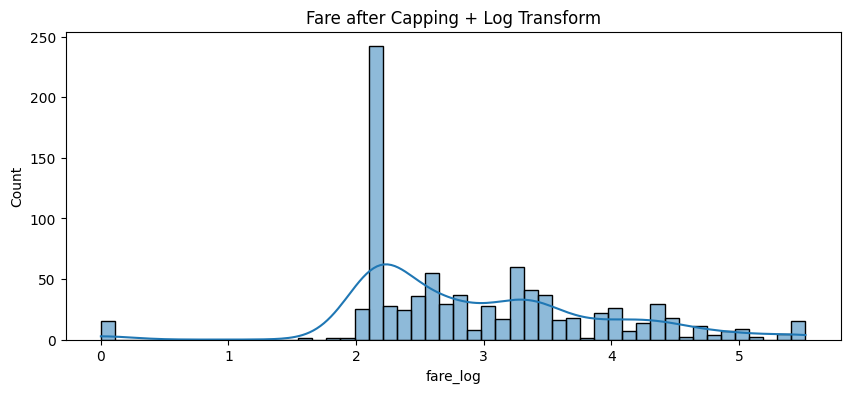

In [71]:
# Example: Treat 'fare' outliers
from scipy.stats.mstats import winsorize
import numpy as np

# 1. Removal using mask from previous function
mask, _ = detect_outliers(df, cols=['fare'], method=('iqr','zscore'))
df_removed = df[~mask].copy()  # keep rows NOT flagged
print("Shape after removal:", df_removed.shape)

# 2. Capping / Winsorization
# Cap bottom 1% and top 99%
df_capped = df.copy()
lower = df_capped['fare'].quantile(0.01)
upper = df_capped['fare'].quantile(0.99)
df_capped['fare'] = np.clip(df_capped['fare'], lower, upper)

# 3. Log Transform (handle skew)
# Add small constant to avoid log(0)
df_capped['fare_log'] = np.log1p(df_capped['fare'])

# 4. Verify with histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot(df_capped['fare_log'], bins=50, kde=True)
plt.title("Fare after Capping + Log Transform")
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

# Step 1: select numeric columns
cols_to_scale = numeric_cols  # e.g., ['age', 'fare', 'sibsp', 'parch']

# Step 2: StandardScaler
scaler_std = StandardScaler()
df_std = df.copy()
df_std[cols_to_scale] = scaler_std.fit_transform(df_std[cols_to_scale])

# Step 3: MinMaxScaler
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[cols_to_scale] = scaler_mm.fit_transform(df_mm[cols_to_scale])

# Step 4: RobustScaler
scaler_rb = RobustScaler()
df_rb = df.copy()
df_rb[cols_to_scale] = scaler_rb.fit_transform(df_rb[cols_to_scale])

# Step 5: PowerTransformer (Yeo-Johnson)
scaler_pt = PowerTransformer(method='yeo-johnson')
df_pt = df.copy()
df_pt[cols_to_scale] = scaler_pt.fit_transform(df_pt[cols_to_scale])

# Step 6: Verify with summary stats
print("StandardScaler stats:\n", df_std[cols_to_scale].describe().T[['mean','std','min','max']])
print("MinMaxScaler stats:\n", df_mm[cols_to_scale].describe().T[['min','max']])


StandardScaler stats:
                              mean       std       min       max
survived             3.987333e-17  1.000562 -0.789272  1.266990
pclass              -8.772133e-17  1.000562 -1.566107  0.827377
age                  2.272780e-16  1.000562 -2.224156  3.891554
sibsp                4.386066e-17  1.000562 -0.474545  6.784163
parch                5.382900e-17  1.000562 -0.473674  6.974147
fare                 3.987333e-18  1.000562 -0.648422  9.667167
survived_missing     0.000000e+00  0.000000  0.000000  0.000000
pclass_missing       0.000000e+00  0.000000  0.000000  0.000000
age_missing          0.000000e+00  0.000000  0.000000  0.000000
sibsp_missing        0.000000e+00  0.000000  0.000000  0.000000
parch_missing        0.000000e+00  0.000000  0.000000  0.000000
fare_missing         0.000000e+00  0.000000  0.000000  0.000000
sex_missing          0.000000e+00  0.000000  0.000000  0.000000
embarked_missing     0.000000e+00  0.000000  0.000000  0.000000
class_missing    

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Step 1: Custom transformer for outlier capping + log-transform
class OutlierCapLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
    
    def fit(self, X, y=None):
        self.lower_ = {}
        self.upper_ = {}
        for col in self.cols:
            self.lower_[col] = X[col].quantile(0.01)
            self.upper_[col] = X[col].quantile(0.99)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            # Cap values
            X[col] = np.clip(X[col], self.lower_[col], self.upper_[col])
            # Log transform
            X[col+'_log'] = np.log1p(X[col])
        return X

# Step 2: Pipeline
pipeline = Pipeline([
    ('outlier_cap_log', OutlierCapLogTransformer(cols=['fare','age'])),
    ('scaler', StandardScaler())
])

# Step 3: Fit and transform
df_processed = pipeline.fit_transform(df[['fare','age']].copy())

# Step 4: Convert to DataFrame for easy
# inspection
df_processed = pd.DataFrame(df_processed, columns=['fare_scaled', 'age_scaled', 'fare_log_scaled', 'age_log_scaled'])
print(df_processed.head())


   fare_scaled  age_scaled  fare_log_scaled  age_log_scaled
0    -0.564109   -0.569558        -0.884451       -0.239179
1     0.942548    0.677983         1.375893        0.630610
2    -0.548227   -0.257673        -0.802548        0.024924
3     0.514708    0.444069         1.074123        0.498771
4    -0.545285    0.444069        -0.788063        0.498771


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Prepare features and target
X = df_processed  # from pipeline: scaled + capped + log-transformed features
y = df['survived']  # target column

# Step 2: Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict & evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6927374301675978
Confusion Matrix:
 [[93 12]
 [43 31]]
